# 1. Perkenalan

**Halo!**

Perkenalkan, Nama saya Zidny Yasrah Sallum, student di Hacktiv8 Batch 20 Remote. 

Pada kesempatan kali ini saya akan membuat model prediksi klasifikasi. Dataset yang saya gunakan adalah data yang saya ambil dari kaggle berjudul "IBM HR Analytics Employee Attrition & Performance" yang diupload oleh _PAVANSUBHASH_. Data ini berisi data tentang karyawan dan atribut-atributnya seperti usia, department, tingkat pendidikan dan lain-lain.

> Problem Statement : 
* Menganalisa terkait alasan atau faktor pengaruh yang membuat terjadinya Attrition pada lingkungan kerja, serta membuat model prediksi untuk memprediksi apakah seorang karywan akan melakukan Attrition atau tidak. 

> Link dataset : _https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset_

> Link Model Deployment : _https://huggingface.co/spaces/zidnyyasrah/Employee-Attrition_

# 2. Import Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import joblib
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [89]:
# Menggunakan pandas untuk load data dari csv dan dijadikan dataframe
data = pd.read_csv('h8dsft_P1M2_Zidny_Yasrah_Sallum.csv')

In [90]:
# Menampilkan 5 data teratas
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [91]:
# Menampilkan 5 data terbawah
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [92]:
# Melihat info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dapat dilihat bahwa dataset memiliki 35 kolom dengan 1470 baris, dengan tipe data integer dan object 

Setelah itu, pada dokumentasi dataset resminya ada keterangan mengenai angka 1-4 di dalam kolom `Education`, `EnvironmentSatisfaction` dll, saya akan ubah angka-angka tersebut sesuai dengan apa yang ada didalam dokumentasi datasetnya

# 4. Exploratory Data Analysis (EDA)

In [93]:
# Mengclone dataframe untuk memudahkan keterbacaan di EDA
data_eda = data.copy() 

Ada beberapa kolom yang berisi 1 sampai 4. Untuk mempermudah, pada bagian EDA ini saya akan ubah value angka tersebut menjadi kategori yang saya ambil dari dokumentasi dataset resminya.

In [94]:
# Mereplace value 1-5 pada kolom Education 
data_eda['Education'].replace({
    1:'Below College',
    2:'College',
    3:'Bachelor',
    4:'Master',
    5:'Doctor'
},inplace=True)

# Mereplace value 1-4 pada kolom EnvironmentSatisfaction 
data_eda['EnvironmentSatisfaction'].replace({
    1:'Low',
    2:'Medium',
    3:'High',
    4:'Very High'
},inplace=True)

# Mereplace value 1-4 pada kolom JobInvolvement 
data_eda['JobInvolvement'].replace({
    1:'Low',
    2:'Medium',
    3:'High',
    4:'Very High'
},inplace=True)

# Mereplace value 1-4 pada kolom JobSatisfaction 
data_eda['JobSatisfaction'].replace({
    1:'Low',
    2:'Medium',
    3:'High',
    4:'Very High'
},inplace=True)

# Mereplace value 1-4 pada kolom PerformanceRating 
data_eda['PerformanceRating'].replace({
    1:'Low',
    2:'Medium',
    3:'High',
    4:'Very High'
},inplace=True)

# Mereplace value 1-4 pada kolom RelationshipSatisfaction 
data_eda['RelationshipSatisfaction'].replace({
    1:'Low',
    2:'Medium',
    3:'High',
    4:'Very High'
},inplace=True)

# Mereplace value 1-4 pada kolom WorkLifeBalance 
data_eda['WorkLifeBalance'].replace({
    1:'Bad',
    2:'Good',
    3:'Better',
    4:'Best'
},inplace=True)

Setelah itu sebagai pembukaan, saya akan melihat perbandingan dari gender pada dataset.

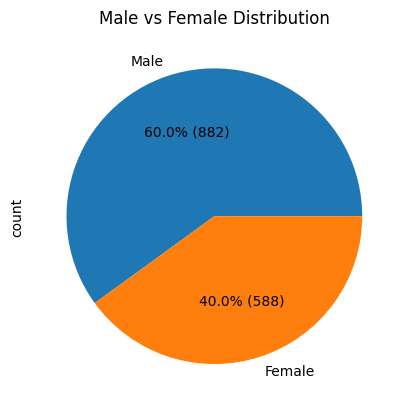

In [95]:
# Membuat variable baru untuk menampung jumlah masing-masing value 
gender = data_eda['Gender'].value_counts()

# Membuat dan menampilkan pie chart
gender.plot(kind='pie', title='Male vs Female Distribution',autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*gender.sum()))
plt.show()

Bisa dilihat bahwa dalam dataset, proporsi karyawan laki-laki lebih banyak daripada yang perempuan. dan uniknya nilai perbedaan dari gender ini bulat 6 banding 4. 

Setelah itu saya mau lihat yang umum-umum dulu yaitu persebaran atau distribusi dari usia.

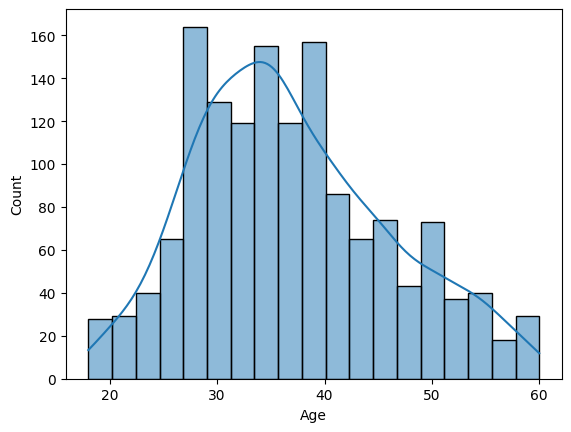

In [96]:
# Membuat dan menampilkan histplot untuk kolom Age
sns.histplot(data=data_eda,x='Age', kde=True)
plt.show()

Bisa dilihat juga, dari distribusi usia diatas, usia tertinggi berada di antara 30 sampai 40 an. dan bisa dibilang pada kolom ini memiliki distribusi yang normal.

Setelah ini saya mau lihat persebaran dari beberapa kolom lain yang ada di dataset.

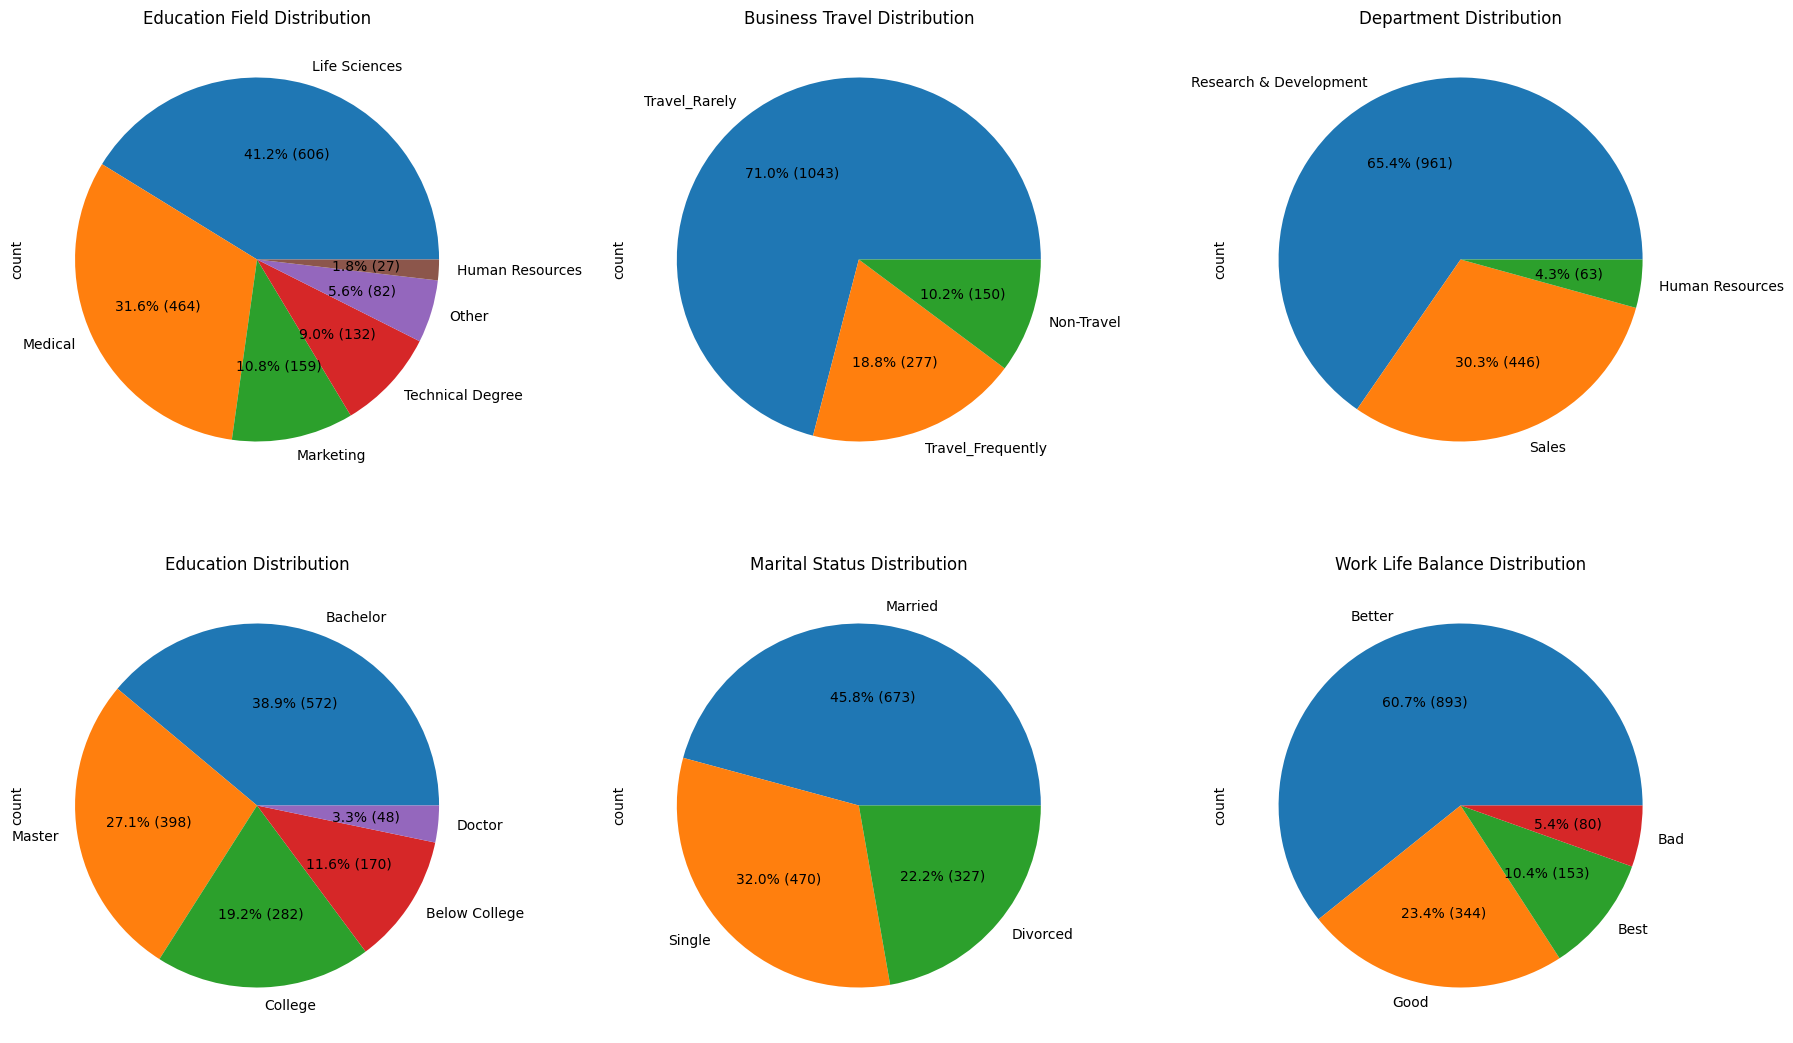

In [97]:
# Membuat variable baru untuk menyimpan unique count dari masing-masing kolom
edufield = data_eda['EducationField'].value_counts()
travel = data_eda['BusinessTravel'].value_counts()
dept = data_eda['Department'].value_counts()
edu = data_eda['Education'].value_counts()
marriage = data_eda['MaritalStatus'].value_counts()
wlb = data_eda['WorkLifeBalance'].value_counts()

# Mengatur ukuran kanvas dari plot
plt.figure(figsize=(22,13))

# Membuat pie chart untuk masing-masing kolom 
plt.subplot(2,3,1)
edufield.plot(kind='pie', title='Education Field Distribution',autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*edufield.sum()))
plt.subplot(2,3,2)
travel.plot(kind='pie', title='Business Travel Distribution',autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*travel.sum()))
plt.subplot(2,3,3)
dept.plot(kind='pie', title='Department Distribution',autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*dept.sum()))
plt.subplot(2,3,4)
edu.plot(kind='pie', title='Education Distribution',autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*edu.sum()))
plt.subplot(2,3,5)
marriage.plot(kind='pie', title='Marital Status Distribution',autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*marriage.sum()))
plt.subplot(2,3,6)
wlb.plot(kind='pie', title='Work Life Balance Distribution',autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*wlb.sum()))

# Menampilkan pie chart
plt.show()

* Pada kolom **Education Field**, berisi jenis pekerjaan atau ranah pekerjaan dari karywaan, bisa dilihat ranah pekerjaan yang terbanyak ada di Life sciences dan disusul oleh ranah medical

* Pada kolom **Business Travel**, berisi data tentang seberapa sering karywan tersebut melakukan perjalanan dinas keluar daerah, bisa dilihat juga kalau kebanyakan karyawan pada data jarang berpergian untuk kepentingan bisnis.

* Pada kolom **Department**, berisi data tentang bagian divisi atau unit dari perusahaan, terlihat pada department Research & Development mendominasi isi dari data karyawan pada dataset ini.

* Pada kolom **Education**, berisi dengan tingkat atau jenjang pendidikan dari karywan, bisa terlihat yang paling tinggi adalah sarjana/bachelor diikuti dengan master/magister

* Pada kolom **Marital Status**, berisi data yang menunjukkan tentang status pernikahan dari karyawan, terlihat kalau banyak karyawan yang sudah menikah

* Pada kolom **Work Life Balance**, kolom yang menarik karena kolom ini bercerita tentang keseimbangan antara kehidupan kerja dan kehidupan pribadi seseorang. Kurangnya keseimbangan antara pekerjaan dan kehidupan pribadi dapat menyebabkan stres, kelelahan, dan masalah kesehatan lainnya, serta berdampak negatif pada hubungan pribadi dan kebahagiaan secara keseluruhan. Bisa dilihat pada kolom ini value terbanyak ada di better yang artinya mayoritas karyawan disini memiliki Work Life Balance yang baik. 

Berbicara tentang work life balance, saya ingin melihat apakah ada pengaruh yang besar terhadap worklifebalance terhadap terjadinya attrition

Untuk melihat perbandingannya agar lebih sesuai, saya tidak menggunakan jumlah dari masing-masing kolom karena adanya perbedaan distribusi work life balance itu sendiri dan juga  perbedaan angka distribusi di kolom attrition. oleh karena itu saya akan menghitung persentasinya agar mendapatkan hasil yang lebih bisa mencerminkan situasinya.

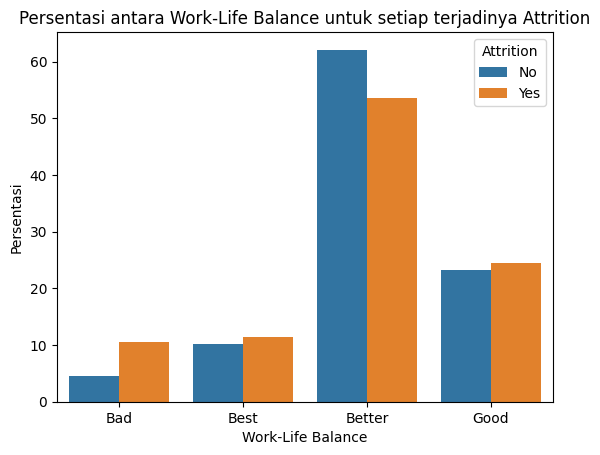

In [98]:
# Menyimpan jumlah data di attrition dan WorkLifeBalance ke dataframe baru
count_df = data_eda.groupby(['Attrition', 'WorkLifeBalance']).size().reset_index(name='Jumlah')

# Menghitung total count untuk setiap yes dan no di kolom attrition
total_counts = count_df.groupby('Attrition')['Jumlah'].transform('sum')

# Menghitung persentasi dari setiap kategori yes dan no
count_df['Persentasi'] = count_df['Jumlah'] / total_counts * 100

# Membuat barplot
sns.barplot(data=count_df, x='WorkLifeBalance', y='Persentasi', hue='Attrition')
plt.xlabel('Work-Life Balance')
plt.ylabel('Persentasi')
plt.title('Persentasi antara Work-Life Balance untuk setiap terjadinya Attrition')

# Menampilkan plot
plt.show()

Bisa dilihat bahwa karyawan yang memiliki Work Life Balance yang tergolong "Bad" akan lebih rentan terhadap attrition atau keluar dari pekerjaan. Namun anehnya, Work Life Balance juga bukan suatu penentu atau ada faktor lain yang membuat attrition ini terjadi, buktinya bisa dilihat bahwa karyawan yang memiliki Work Life Balance yang tergolong "Best" juga rentan melakukan attrition. 

Tapi tentu saja attrition atau keluar dari pekerjaan ini terjadi alasannya bukan hanya ketidakpuasan pada tempat kerja, namun bisa ada faktor lain seperti pensiun, relokasi divisi, alasan keluarga atau alasan kesehatan dan lain-lainnya. Selanjutnya saya ingin lihat apakah attrition ini dipengaruhi oleh jumlah tahun bekerja dan juga jumlah salary dari karyawan tersebut

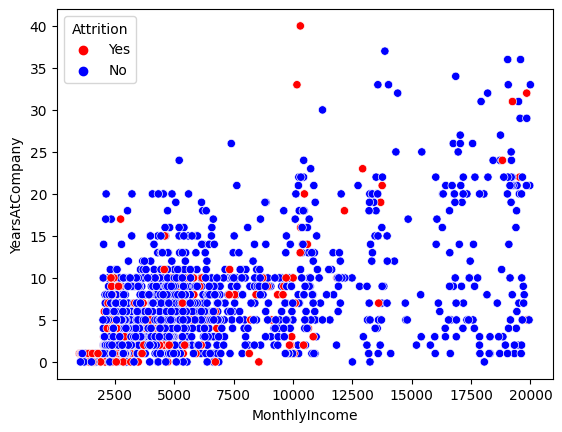

In [99]:
# Membuat scatterplot antara jumlah tahun dan gaji bulanan.
sns.scatterplot(data=data_eda, y='YearsAtCompany', x='MonthlyIncome', hue='Attrition', palette={'Yes': 'red', 'No': 'blue'})
plt.show()

Bisa dilihat pada scatterplot diatas, attrition sering terjadi ketika karywan tersebut masih memiliki jumlah tahun bekerja dan juga jumlah income yang relatif kecil, bisa dilihat pada sumbu monthlyincome diatas, semakin tinggi income karyawan, maka akan semakin jarang terjadinya attrition.

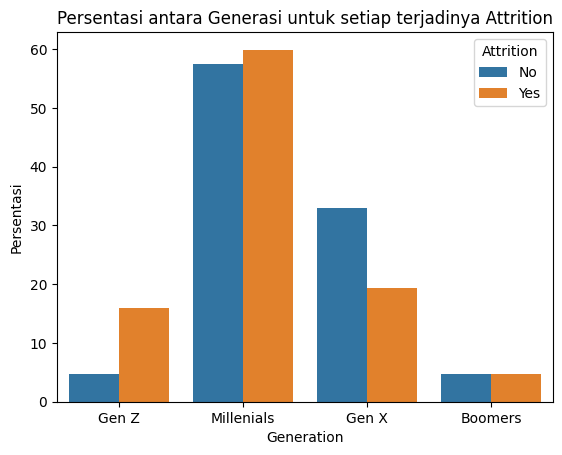

In [100]:
bins= [0,25,40,55,75]
labels = ['Gen Z','Millenials','Gen X','Boomers']
data_eda['Generation'] = pd.cut(data_eda['Age'], bins=bins, labels=labels, right=False)

# Menyimpan jumlah data di attrition dan WorkLifeBalance ke dataframe baru
count_df = data_eda.groupby(['Attrition', 'Generation']).size().reset_index(name='Jumlah')

# Menghitung total count untuk setiap yes dan no di kolom attrition
total_counts = count_df.groupby('Attrition')['Jumlah'].transform('sum')

# Menghitung persentasi dari setiap kategori yes dan no
count_df['Persentasi'] = count_df['Jumlah'] / total_counts * 100

# Membuat barplot
sns.barplot(data=count_df, x='Generation', y='Persentasi', hue='Attrition')
plt.title('Persentasi antara Generasi untuk setiap terjadinya Attrition')

# Menampilkan plot
plt.show()

Bersumber dari _"https://www.beresfordresearch.com/age-range-by-generation/"_

* Boomers adalah generasi yang lahir pada tahun 1946-1964, bisa dilihat pada plot diatas, jumlah karyawan yang tergolong di generasi ini sudah tinggal sedikit, menunjukkan bahwa generasi ini sudah banyak yang pada pensiun.

* Gen X adalah generasi yang lahir pada tahun 1965-1980, bisa dilihat pada plot diatas, generasi ini jarang melakukan attrition, menunjukkan kalau generasi ini kebanyakan nyaman atau setia pada perusahaan.

* Millenials adalah generasi yang lahir pada tahun 1981-1996, bisa dilihat proporsi dari yang melakukan attrition dan yang tidak jumlahnya sama banyak, menunjukkan keseimbangan antara kedua kategori tersebut, jadi di generasi ini ada yang setia pada 1 perusahaan dan ada juga yang tidak.

* Gen Z adalah generasi yang lahir pada tahun 1997-2012, bisa dilihat banyaknya jumlah attrition pada generasi ini, generasi ini adalah generasi yang paling banyak melakukan attrition.

Sebagai tambahan, saya kutip dari _"https://www.unleash.ai/talent-management/why-gen-z-is-generation-quit"_

"According to Bankrate, 77% of Gen Z workers are thinking about leaving their jobs while Microsoft found that 54% of Gen Z workers are looking to quit.

Jadi memang valid bahwa Gen Z adalah generasi yang paling sering melakukan quitting atau attrition dari pekerjaannya. 

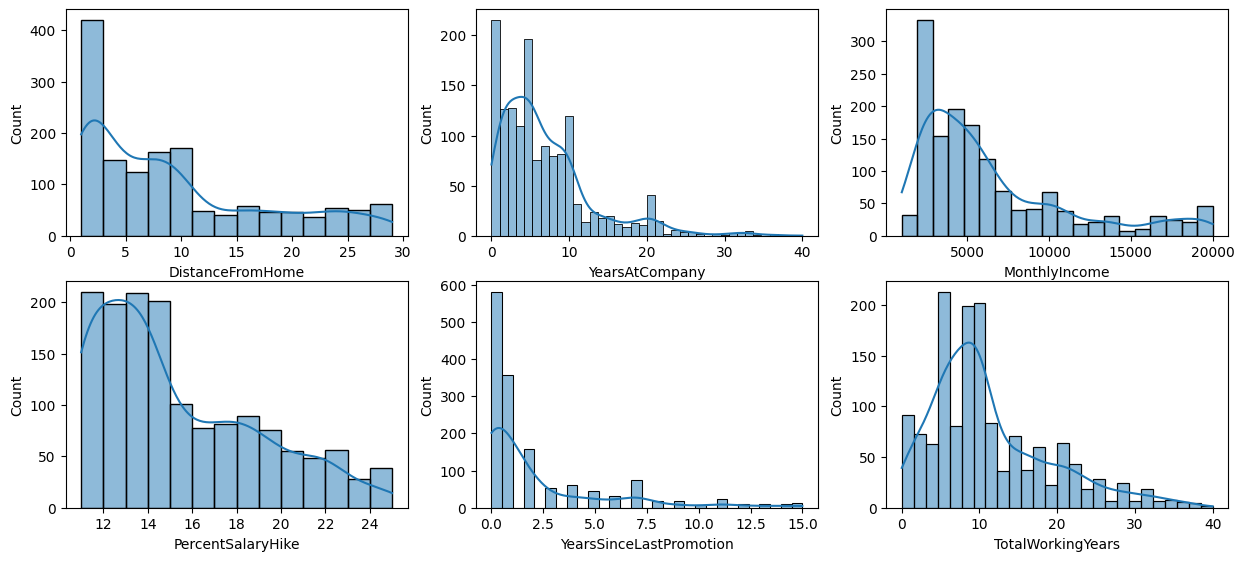

In [101]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.histplot(data_eda['DistanceFromHome'], kde=True)

plt.subplot(3, 3, 2)
sns.histplot(data_eda['YearsAtCompany'], kde=True)

plt.subplot(3, 3, 3)
sns.histplot(data_eda['MonthlyIncome'], kde=True)

plt.subplot(3, 3, 4)
sns.histplot(data_eda['PercentSalaryHike'], kde=True)

plt.subplot(3, 3, 5)
sns.histplot(data_eda['YearsSinceLastPromotion'], kde=True)

plt.subplot(3, 3, 6)
sns.histplot(data_eda['TotalWorkingYears'], kde=True)
plt.show()

Setelah  ini saya akan melihat korelasi dari kolom-kolom yang termasuk numerikal.

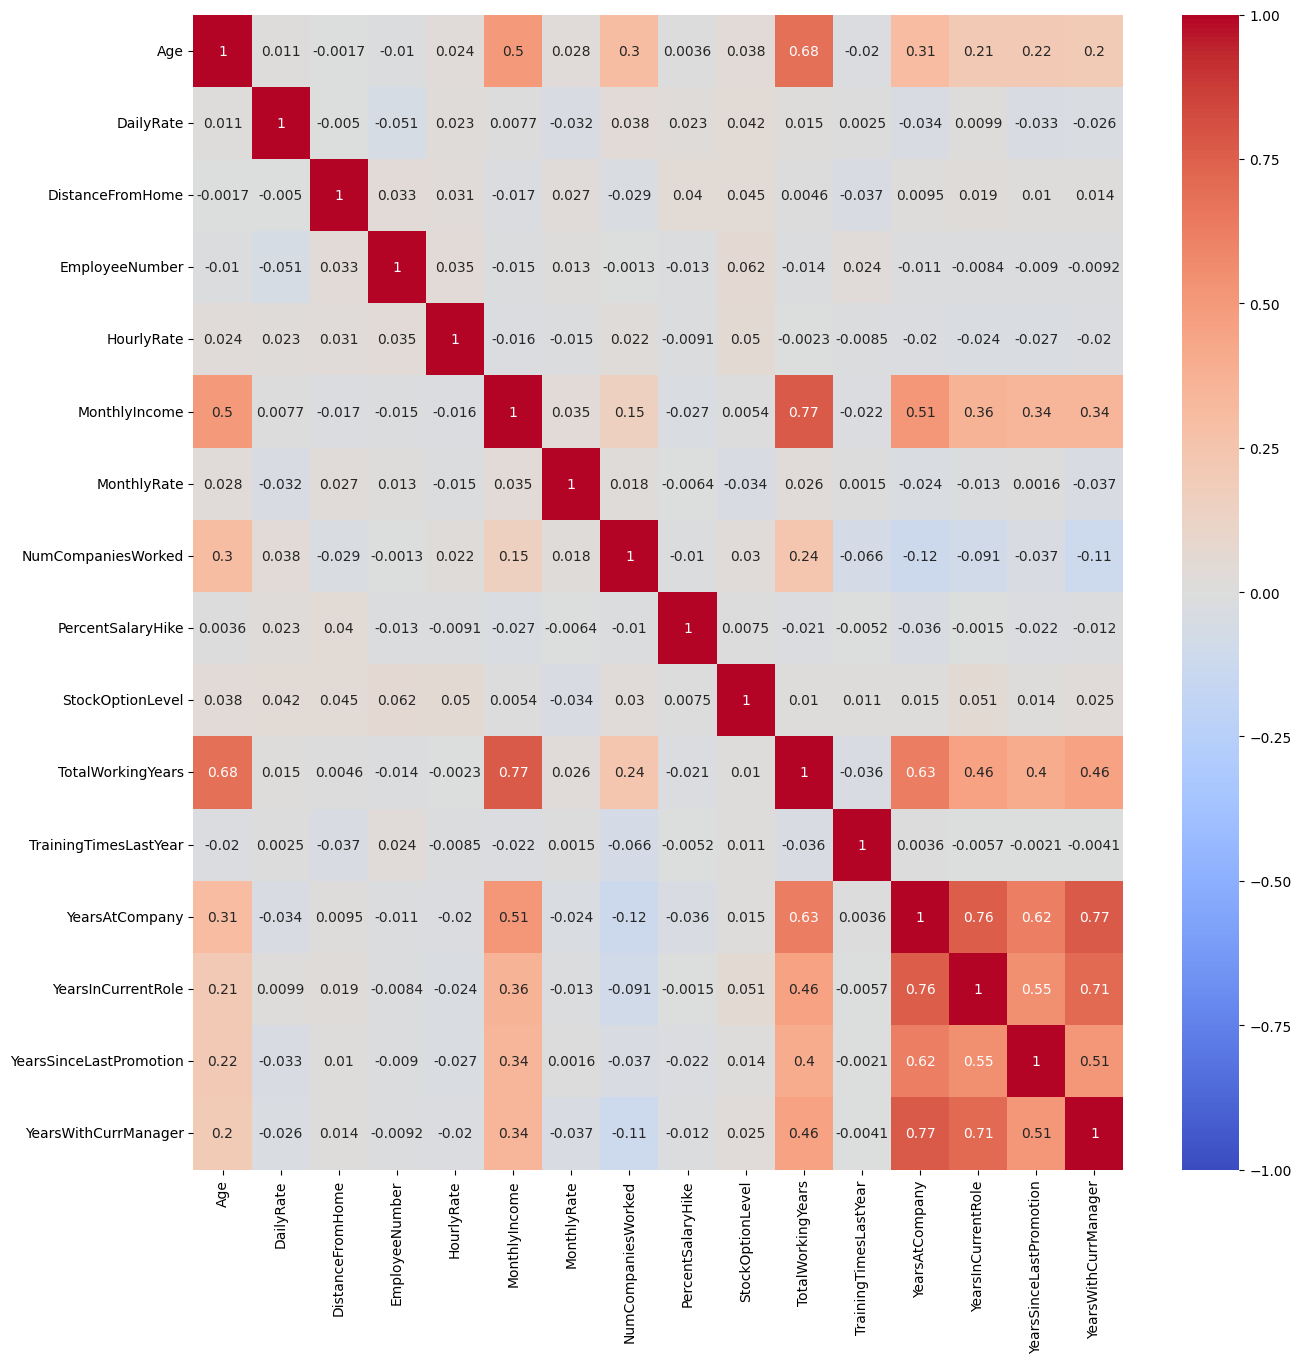

In [102]:
# Membuat list untuk menampung kolom yang tergolong numerik saja
data_corr = data_eda.copy()
data_corr = data_corr.drop(['StandardHours','EmployeeCount','JobLevel'], axis=1)
numeric_features = data_corr.select_dtypes(include=['int64']).columns

# Membuat heatmap correlation pada kolom numerik
corr = data_corr[numeric_features].corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

* Ada beberapa kolom yang memiliki korelasi tinggi satu sama lainnya seperti kolom `TotalWorkingYears` dengan `Age`

* stelah itu ada korelasi sebesar 0.51 terhadap age dan monthly income, menunjukkan semakin tinggi usia, maka monthly income atau penghasilan bulanannya cenderung akan semakin tinggi juga.

* Sama halnya terhadap kolom `YearsAtCompany`, semakin tinggi tahun kita bekerja pada suatu perusahaan maka penghasilan bulanan cenderung ikut naik juga.

* Ada juga di kolom `YearsInCurrentRole`, `YearsSinceLastPromotion`, dan `YearsWithCurrManager` yang memiliki korelasi cukup signifikan.

Selain kolom-kolom tersebut, terlihat tidak ada korelasi yang terlalu besar. Untuk menghandle korelasi yang tinggi pada fitur-fitur ini saya akan melakukannya di feature engineering nantinya.

Setelah ini saya akan melihat distribusi dari kolom yang akan dijadikan label atau target nantinya yaitu kolom attrition

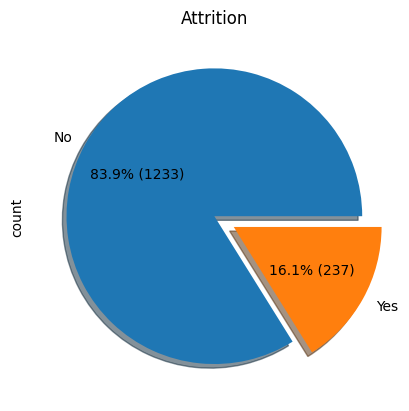

In [103]:
# Membuat variable baru untuk menampung jumlah masing-masing value 
attrition = data_eda['Attrition'].value_counts()

# Membuat dan menampilkan pie chart
explode = [0,0.15]
attrition.plot(kind='pie', shadow=True,explode=explode,title='Attrition', autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*attrition.sum()))
plt.show()

Ada pacman, menandakan imbalance pada kolom attrition, terlihat bahwa jumlah data yang tergolong "yes" hanya berjumlah 237 atau 16% saja jika dibandingkan dengan yang "no" itu ada 1233 atau sebanyak 84%. 

# 5. Feature Engineering

## Feature Selection

Saya akan menghapus beberapa kolom yang memiliki 1 unique values, yang artinya isi dari kolom ini mempunyai value yang sama pada tiap barisnya. Dan menghapus beberapa kolom yang memiliki korelasi yang tinggi dengan kolom lainnya Serta juga menghapus beberapa kolom lainnya yang menurut personal judgement saya tidak akan berpengaruh terhadap model.

In [104]:
data.drop(['EmployeeCount','Over18','StandardHours','YearsWithCurrManager','YearsSinceLastPromotion',
           'YearsInCurrentRole','TotalWorkingYears','EmployeeNumber'],axis=1, inplace=True)

## Splitting Data

In [105]:
# Split data antara X dan y
X = data.drop('Attrition',axis=1)
y = data['Attrition']

# Menampilkan data y
y.replace({'Yes': 1, 'No': 0}, inplace=True)
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [106]:
# Split data untuk dibagi lagi menjadi 4 bagian test dan train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

# Menampilkan ukuran dari masing-masing train dan test set
print('Size of Train-Set : ', X_train.shape)
print('Size of Test-Set  : ', X_test.shape)

Size of Train-Set :  (1176, 26)
Size of Test-Set  :  (294, 26)


## Missing Values

In [107]:
# Melihat apakah ada null values pada dataframe
print('Missing Values Train-set :',X_train.isnull().values.any())
print('Missing Values Test-set :',X_test.isnull().values.any())

Missing Values Train-set : False
Missing Values Test-set : False


Terlihat bahwa tidak ada missing values pada Train dan juga Test set. 

## Outliers

Disini saya tidak melakukan outliers handling, dikarenakan tidak adanya outliers yang signifikan pada dataset, terlebih lagi saya juga ingin membiarkan value outliers tersebut alasannya karena mereka bukan berasal dari error atau salahnya input data. Jadi, jika saya menghilangkan atau memanipulasi data itu akan menjadikan model yang akan dibuat nanti menjadi tidak akurat ketika memprediksi extreme values yang benar-benar ada di kehidupan nyata.

## Duplicate Data

Mengecek apakah ada duplikasi pada data di Train set dan juga test set.

In [108]:
# Mengecek apakah ada data duplikat
print('Duplicate Data Train-set :',X_train.duplicated().values.any())
print('Duplicate Data Test-set :',X_test.duplicated().values.any())

Duplicate Data Train-set : False
Duplicate Data Test-set : False


Terlihat bahwa tidak ada duplicate data pada Train dan juga Test set. 

## Imbalance Data

Seperti yang sudah diketahui dari EDA diatas label atau target yang ada di dataset ini mempunyai data yang imbalance, jumlah "yes" atau "1" hanya berjumlah 16% dan pada class "no" atau "0" itu ada 84%. Ketidakseimbangan jumlah class yang ada pada target ini bisa membuat model yang akan dibuat nanti menjadi condong untuk memprediksi kelas mayoritas (no) dan mengabaikan kelas minoritas (yes).

Untuk mengatasi imbalance tersebut, saya akan menggunakan metode SMOTE atau **Synthetic Minority Over-sampling Technique**. SMOTE yang saya gunakan disini menggunakan _sampling_strategy_ = `minority` jadi dia bisa membantu untuk mengatasi masalah imbalance data dengan menciptakan sampel sintetis pada kelas minoritas. Dengan demikian, jumlah sampel pada kelas minoritas menjadi lebih seimbang dengan kelas mayoritas, yang dapat meningkatkan performa model dalam mengidentifikasi kelas minoritas.

In [109]:
# membuat smote
smote = SMOTE(sampling_strategy='minority', random_state=42)

## Feature Scaling

Pada Feature Scaling disini saya menggunakan StandardScaler, alasannya dikarenakan data yang bisa dibilang terdistribusi normal jadi saya akan melakukan standarisasi pada data dengan menggunakan StandardScaler alasannya karena algoritma yang berbasis pada perhitungan jarak, sangat dipengaruhi oleh skala data. Jika fitur-fitur memiliki skala yang berbeda, algoritma dapat memberikan bobot yang berbeda pada masing-masing fitur. Dengan menggunakan StandardScaler, saya dapat memastikan bahwa semua fitur memiliki skala yang serupa dan dapat diperlakukan dengan setara.

In [110]:
# Menampung fitur yang tergolong numerik kedalam list
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Membuat Pipeline untuk numerik scaler 
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

## Feature Encoding

Untuk bagian encoding, saya menggunakan OneHotEncoder. Alasannya, dikarenakan kolom kategorikal yang saya pilih tersebut tidak memiliki tingkatan ataupun order. Jadi encoder seperti OneHotEncoder lebih cocok untuk kasus ini dibanding encoder-encoder lainnya seperti ordinalencoder dll. 

In [111]:
# Menampung fitur yang tergolong kategorik kedalam list
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Membuat Pipeline untuk kategorik encoder
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder())]
)

## Column Transformer

Disini saya akan menggabungkan kedua kolom yang sudah discale dan di encode menjadi 1 bagian menggunakan ColumnTransformer.

In [112]:
# Membuat Column transformer untuk melakukan scaling dan encoding dan menggabungkan kedua tipe data tersebut
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ord", categorical_transformer, categorical_features)],
        remainder = 'passthrough' # Untuk melewatkan selain fitur yg di transform
)

# 6. Model Definition

Saya menggunakan Model Decision Tree Classifier, Logistic Regression, SVC, Random Forest dan Gradient Boosting. Saya sangat tertarik terutama dengan Gradint Boosting, karena Gradient boosting mempunyai kemampuan untuk mengatasi outliers dan juga noise, karena cara kerjanya gradient boosting yang memang memperbaiki kesalahan-kesalahan pada model yang dilakukan sebelumnya membuat model ini lebih robust terhadap outliers dan juga noise. 

In [113]:
# Membuat Pipeline untuk Decision Tree
pipe_dt = Pipeline([
    ('preprocessor', preprocessor), 
    ('smote', smote),
    ('dt', DecisionTreeClassifier())
])

# Membuat Pipeline untuk Logistic Regression
pipe_lr = Pipeline([
    ('preprocessor', preprocessor), 
    ('smote', smote),
    ('lr', LogisticRegression())
])

# Membuat Pipeline untuk SVC
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', smote), 
    ('svc', SVC(probability=True))
])

# Membuat Pipeline untuk Random Forest
pipe_rf = Pipeline([
    ('preprocessor', preprocessor), 
    ('smote', smote),
    ('rf', RandomForestClassifier())
])

# Membuat Pipeline untuk Gradient Boosting
pipe_gb = Pipeline([
    ('preprocessor', preprocessor), 
    ('smote', smote),
    ('gb', GradientBoostingClassifier())
])

# 7. Model Training

Pertama-tama pada sesi ini saya akan train seluruh model menggunakan parameter defaultnya. Nanti setelah itu baru akan dilakukan hyperparameter tuning dan akan dibandingkan hasilnya.

In [114]:
# Train Decision Tree
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHik...
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('dt', DecisionTreeClassifier())])

In [115]:
# Train Logistic Regression
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHik...
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('lr', LogisticRegression())])

In [116]:
# Train SVC
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHik...
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('svc', SVC(probability=True))])

In [117]:
# Train Random Forest
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHik...
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('rf', RandomForestClassifier())])

In [118]:
# Train Gradient Boosting
pipe_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHik...
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('gb', GradientBoostingClassifier())])

# 8. Model Evaluation

Sebagai evaluasi, saya akan melihat ROC-AUC scorenya pada model-model baseline yang sudah ditrain tadi. 

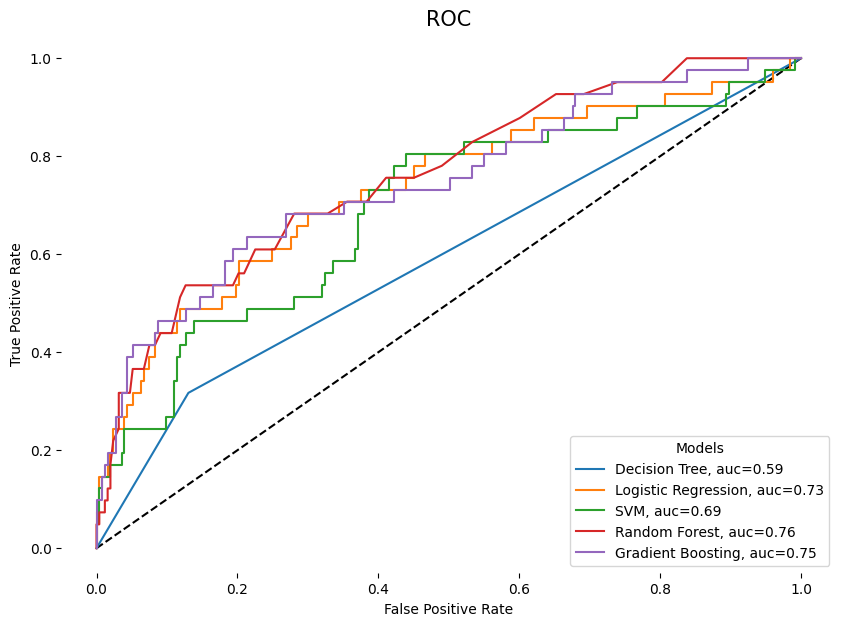

In [119]:
y_pred_proba_lr = pipe_dt.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba_lr)
auc1 = roc_auc_score(y_test, y_pred_proba_lr)

y_pred_proba_svc = pipe_lr.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test,  y_pred_proba_svc)
auc2 = roc_auc_score(y_test, y_pred_proba_svc)

y_pred_proba_tree = pipe_svc.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = roc_curve(y_test,  y_pred_proba_tree)
auc3 = roc_auc_score(y_test, y_pred_proba_tree)

y_pred_proba_forest = pipe_rf.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = roc_curve(y_test,  y_pred_proba_forest)
auc4 = roc_auc_score(y_test, y_pred_proba_forest)

y_pred_proba_knn = pipe_gb.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = roc_curve(y_test,  y_pred_proba_knn)
auc5 = roc_auc_score(y_test, y_pred_proba_knn)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Decision Tree, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Logistic Regression, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="SVM, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Random Forest, auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="Gradient Boosting, auc="+str(round(auc5,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.show()

Area di bawah kurva ROC adalah AUC (Area Under the Curve) yang digunakan sebagai indeks evaluasi untuk model klasifikasi, nilai AUC terbaik adalah 1 menunjukkan prediksi sempurna dan jika 0.5 menunjukkan prediksi acak. Dapat dilihat pada graph diatas, score AUC tertinggi didapat oleh model Random Forest sebesar 0.76. Artinya model ini bisa memprediksi antara yes dan no dengan ketepatan sebesar 76%.

Namun bisa dilihat kalau keseluruhan model-model ini memiliki score yang terbilang rendah, oleh karena itu saya akan melakukan hyperparameter tuning terhadap seluruh modelnya.

## Hyperparameter Tuning

Saya melakukan hyperparameter tuning menggunakan GridSearchCV untuk memastikan bahwa gridsearch tersebut mencoba satu persatu hyperparameter yang saya definisikan untuk masing-masing modelnya.

In [141]:
# Mengatur Hyperparameters yang akan digunakan
param_dt = {
    'dt__criterion' : ['gini','entropy'],
    'dt__max_depth' : [None, 5, 10]
    }
# Membuat grid search untuk Logistic Regression
grid_dt = GridSearchCV(pipe_dt, param_grid=param_dt, verbose=1, cv=5, n_jobs=-1)

param_lr = {
    'lr__C' : np.logspace(-3, 3, 7),
    'lr__max_iter' : [100, 200, 300]
    }
# Membuat grid search untuk Logistic Regression
grid_lr = GridSearchCV(pipe_lr, param_grid=param_lr, verbose=1, cv=5, n_jobs=-1)

# Mengatur Hyperparameters yang akan digunakan
param_svc = {
    'svc__C' :[0.1, 1, 10],
    'svc__gamma' : ['scale', 'auto', 0.1, 1]
    }
# Membuat grid search untuk Gradient Boosting
grid_svc = GridSearchCV(pipe_svc, param_grid=param_svc, verbose=1, cv=5, n_jobs=-1)

# Mengatur Hyperparameters yang akan digunakan
param_rf = {
    'rf__n_estimators' :[50,100,200],
    'rf__max_depth' : [None,10,20]
    }
# Membuat grid search untuk Random Forest
grid_rf = GridSearchCV(pipe_rf, param_grid=param_rf, verbose=1, cv=5, n_jobs=-1)

# Mengatur Hyperparameters yang akan digunakan
param_gb = {
    'gb__n_estimators' :[50,100,200],
    'gb__learning_rate' : [0.1, 0.2]
    }
# Membuat grid search untuk Gradient Boosting
grid_gb = GridSearchCV(pipe_gb, param_grid=param_gb, verbose=1, cv=5, n_jobs=-1)

Setelah ini saya akan re-train masing-masing model dengan konfigurasi gridsearchcv diatas.

In [121]:
# Train Decision Tree
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompan...
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy='minority')),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 5, 10]},
             verbose=1)

In [122]:
# Train Logistic Regression
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompan...
                                                                                          OneHotEncoder())]),
                                                                         Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy='minority')),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'lr__max_iter': [100, 200, 300]},
             verbose=1)

In [123]:
# Train SVC
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompan...
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy='minority')),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto', 0.1, 1]},
             verbose=1)

In [124]:
# Train Random Forest
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompan...
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy='minority')),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__n_estimators': [50, 100, 200]},
             verbose=1)

In [142]:
# Train Gradient Boosting
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompan...
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy='minority')),
                                       ('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': [0.1, 0.2],
                         'gb__n_estimators': [50, 100, 200]},
             verbose=1)

## Model Re-Evaluation

Saya akan melakukan re-evaluasi terhadap model-model yang sudah dilakukan hyperparameter tuning, dengan melakukan cross validation dari masing-masing model tersebut.

In [145]:
# Membuat variable untuk menampung KFold
kf = KFold(n_splits=5, shuffle=True)

# Menghitung cross-validation dengan Pipeline
scores_dt = cross_val_score(grid_dt, X, y, cv=kf, n_jobs=-1)
scores_lr = cross_val_score(grid_lr, X, y, cv=kf, n_jobs=-1)
scores_svc = cross_val_score(pipe_svc, X, y, cv=kf, n_jobs=-1)
scores_rf = cross_val_score(grid_rf, X, y, cv=kf, n_jobs=-1)
scores_gb = cross_val_score(grid_gb, X, y, cv=kf, n_jobs=-1)

In [146]:
# Menampilkan hasil cross validation untuk setiap model
print('Cross-Validation Mean Score :')
print('\nDecision Tree:', round(scores_dt.mean(),4),'| std:', round(scores_dt.std(),4))
print('Logistic Regression:', round(scores_lr.mean(),4),'| std:', round(scores_lr.std(),4))
print('SVC:', round(scores_svc.mean(),4),'| std:', round(scores_svc.std(),4))
print('Random Forest:', round(scores_rf.mean(),4),'| std:', round(scores_rf.std(),4))
print('Gradient Boosting:', round(scores_gb.mean(),4),'| std:', round(scores_gb.std(),4))

Cross-Validation Mean Score :

Decision Tree: 0.7993 | std: 0.031
Logistic Regression: 0.7524 | std: 0.0154
SVC: 0.832 | std: 0.0145
Random Forest: 0.8585 | std: 0.0134
Gradient Boosting: 0.8707 | std: 0.0146


Dapat dilihat diatas pada model yang memiliki peforma teratas adalah Random Forest dan Gradient Boosting, namun saya masih memilih Random Forest untuk kasus ini karena memiliki std yang lebih rendah ketimbang Gradient Boosting, dan juga dilihat dari score roc pertama tadi Random Forest juga sedikit lebih unggul

Selanjutnya saya akan menggunakan Classification Report dan Confusion Matrix sebagai metriks yang akan saya gunakan untuk mengevaluasi peforma model terhadap test set, classification report berisi ringkasan yang lengkap terhadap kinerja model, terdapat metriks seperti precision, recall, f1-score dan accuracy. 

In [128]:
result = [grid_dt, grid_lr, grid_svc, grid_rf, grid_gb]
labels = ['Decision Tree','Logistic Regression','SVC', 'Random Forest','Gradient Boosting']
count = 0

for i in result:
    y_pred_new_threshold = (i.predict_proba(X_test)[:,1]>=0.5).astype(int)
    print(f'Classification Report {labels[count]} : \n', classification_report(y_test, y_pred_new_threshold), '\n')
    count +=1
    print('='*55)

Classification Report Decision Tree : 
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       253
           1       0.35      0.37      0.36        41

    accuracy                           0.82       294
   macro avg       0.62      0.63      0.62       294
weighted avg       0.82      0.82      0.82       294
 

Classification Report Logistic Regression : 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       253
           1       0.31      0.59      0.41        41

    accuracy                           0.76       294
   macro avg       0.62      0.69      0.63       294
weighted avg       0.84      0.76      0.79       294
 

Classification Report SVC : 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       253
           1       0.50      0.07      0.13        41

    accuracy                           0.86       294
   macro

dapat terlihat dari confusion matrix diatas, ditinjau dari metriks accuracy, uniknya SVC, Random Forest, dan Gradient Boosting memiliki score yang sama yaitu 0.86. Namun bisa dilihat dalam classification report milik SVC, recall untuk class "1" atau "yes" sangat rendah yaitu 0.07, menunjukkan bahwa model ini tidak bisa memprediksi dengan baik dari class "yes". Sedangkan untuk gradient boosting dan juga random forest memiliki score yang hampir-hampir mirip untuk keduanya, namun bisa dilihat kalau random forest sedikit lebih unggul daripada gradient boosting.

Dikarenakan Random Forest sedikit lebih unggul daripada Gradient Boosting, saya akan menggunakan model Random Forest saja, namun sebelum itu saya akan lihat Confusion Matrix dari model Random Forest ini.

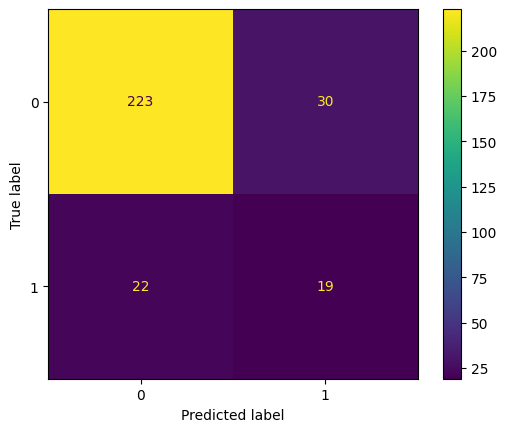

In [129]:
y_pred_new_threshold = (grid_rf.predict_proba(X_test)[:,1]>=0.35).astype(int)
matrix = confusion_matrix(y_test, y_pred_new_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[0, 1])
disp.plot()
plt.show()

Pada confusion matrix, kita bisa melihat seberapa baik model dapat mengklasifikasikan sample-sample kedalam kelas yang benar dan seberapa sering model membuat kesalahan dalam klasifikasi. 

Nah, pada Confusion Matrix diatas, saya mengatur threshold terhadap decision boundary nya menjadi 0.35 alasannya agar score recall bisa lebih tinggi, dikarenakan saya tidak ingin model memprediksi yang seharusnya karyawan akan melakukan Attrition tapi diprediksi sebagai 0 atau tidak melakukan attrition. Untuk itu saya melakukan pengaturan threshold agar score recall disini tidak terlalu rendah. 

# 9. Model Saving

In [130]:
# Menggunakan joblib untuk mengexport model
joblib.dump(grid_rf, 'model.pkl')

['model.pkl']

# 10. Model Inference

In [131]:
# Menggunakan joblib untuk meload model
pipeline = joblib.load('model.pkl')

In [132]:
# Membuat data inference baru
data_inf = {
    'Age': 20,
    'BusinessTravel': 'Travel_Rarely',
    'DailyRate': 426,
    'Department': 'Research & Development',
    'DistanceFromHome': 15,
    'Education': 3,
    'EducationField': 'Technical Degree',
    'EnvironmentSatisfaction': 3,
    'Gender': 'Male',
    'HourlyRate': 58,
    'JobInvolvement': 2,
    'JobLevel': 2,
    'JobRole': 'Human Resources',
    'JobSatisfaction': 3,
    'MaritalStatus': 'Single',
    'MonthlyIncome': 2700,
    'MonthlyRate': 14977,
    'NumCompaniesWorked': 2,
    'OverTime': 'No',
    'PercentSalaryHike': 12,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 2,
    'StockOptionLevel': 1,
    'TrainingTimesLastYear': 2,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 2,
}

# Mengubah dictionary ke dataframe
data_inf = pd.DataFrame([data_inf])

# Menampilkan dataframe baru
data_inf

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,20,Travel_Rarely,426,Research & Development,15,3,Technical Degree,3,Male,58,2,2,Human Resources,3,Single,2700,14977,2,No,12,3,2,1,2,3,2


In [133]:
# Melakukan prediksi dengan model dari data baru
prediksi = pipeline.predict(data_inf)
print(prediksi)

[0]


# 11. Conclusion

Kesimpulan yang bisa saya sampaikan adalah dari model yang saya buat masih ada beberapa yang bisa ditingkatkan seperti pemilihan hyperparameter yang lebih baik, atau menggunakan metode handling imbalance data yang lain. Namun untuk keseluruhan menurut saya model ini sudah bisa digunakan sebagai mana messtinya setelah saya mengatur threshold dari decision boundary pada model Random Forest yang dari defaultnya 0.5 menjadi 0.35 Dengan begitu saya berharap model bisa lebih baik dalam memprediksi class positive atau dalam data ini adalah class yang termasuk attrition.

Untuk karywan-karyawan yang paling sering melakukan attrition itu sendiri adalah generasi Z atau generasi yang lahir pada tahun 1997-2012, ditinjau dengan banyaknya jumlah attrition pada generasi ini. Alasannya?

Generasi Z cenderung mengalami attrition karena memiliki ekspektasi karir yang tinggi, mencari variasi dan tantangan dalam pekerjaan, sangat menjunjung "Work Life Balance", mencari lingkungan kerja yang inklusif dan mendukung, dan menginginkan kesempatan pengembangan dan pembelajaran. Gaya manajemen yang berbeda juga bisa menjadi faktor yang mempengaruhi attrition di kalangan generasi Z.